In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [68]:
df = pd.read_csv('income.csv')

In [69]:
df = pd.concat([df.drop("occupation", axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop("workclass", axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = df.drop("education", axis=1)
df = pd.concat([df.drop("marital-status", axis=1), pd.get_dummies(df["marital-status"]).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop("relationship", axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop("race", axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop("native-country", axis=1), pd.get_dummies(df["native-country"]).add_prefix('native-country_')], axis=1)

In [70]:
df["gender"] = df["gender"].apply(lambda x: 1 if x == "Male" else 0)
df["income"] = df["income"].apply(lambda x: 1 if x == ">50k" else 0)

<Axes: >

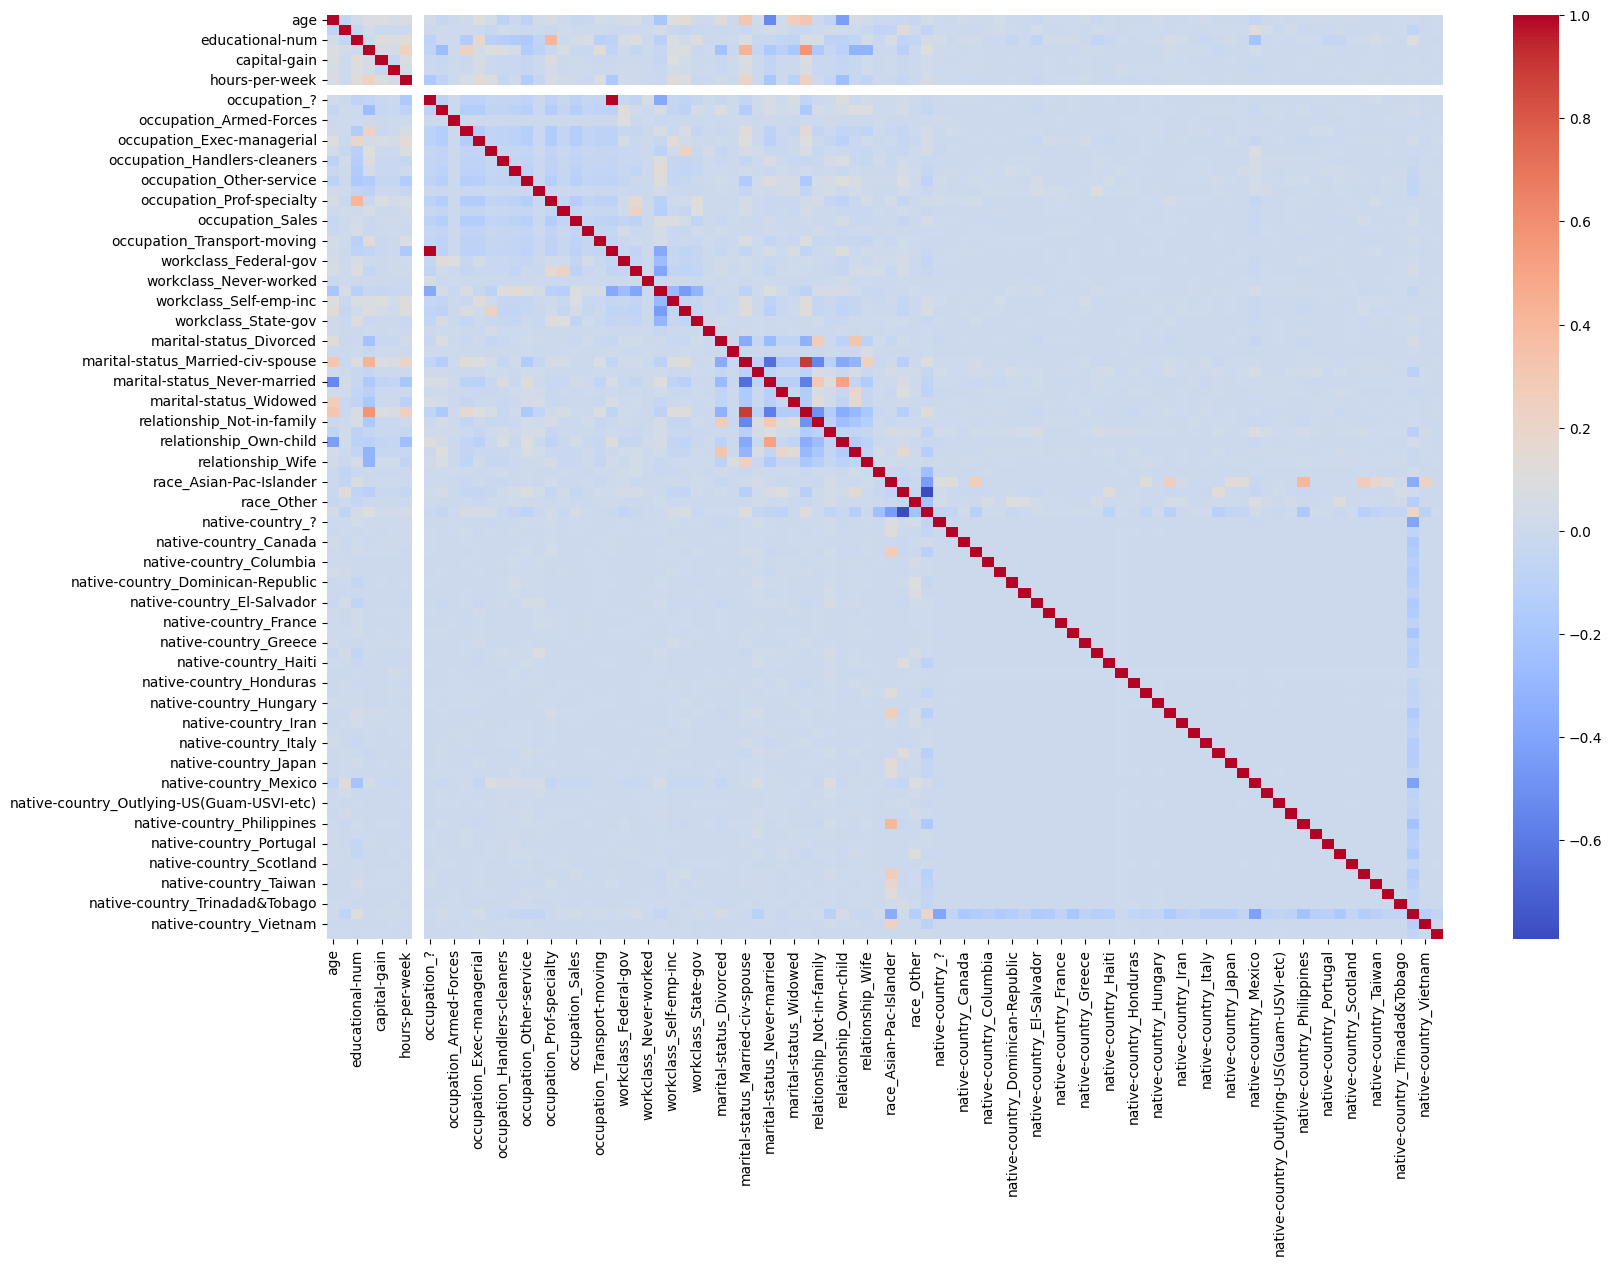

In [71]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")

In [72]:
correlations = df.corr()["income"].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

<Axes: >

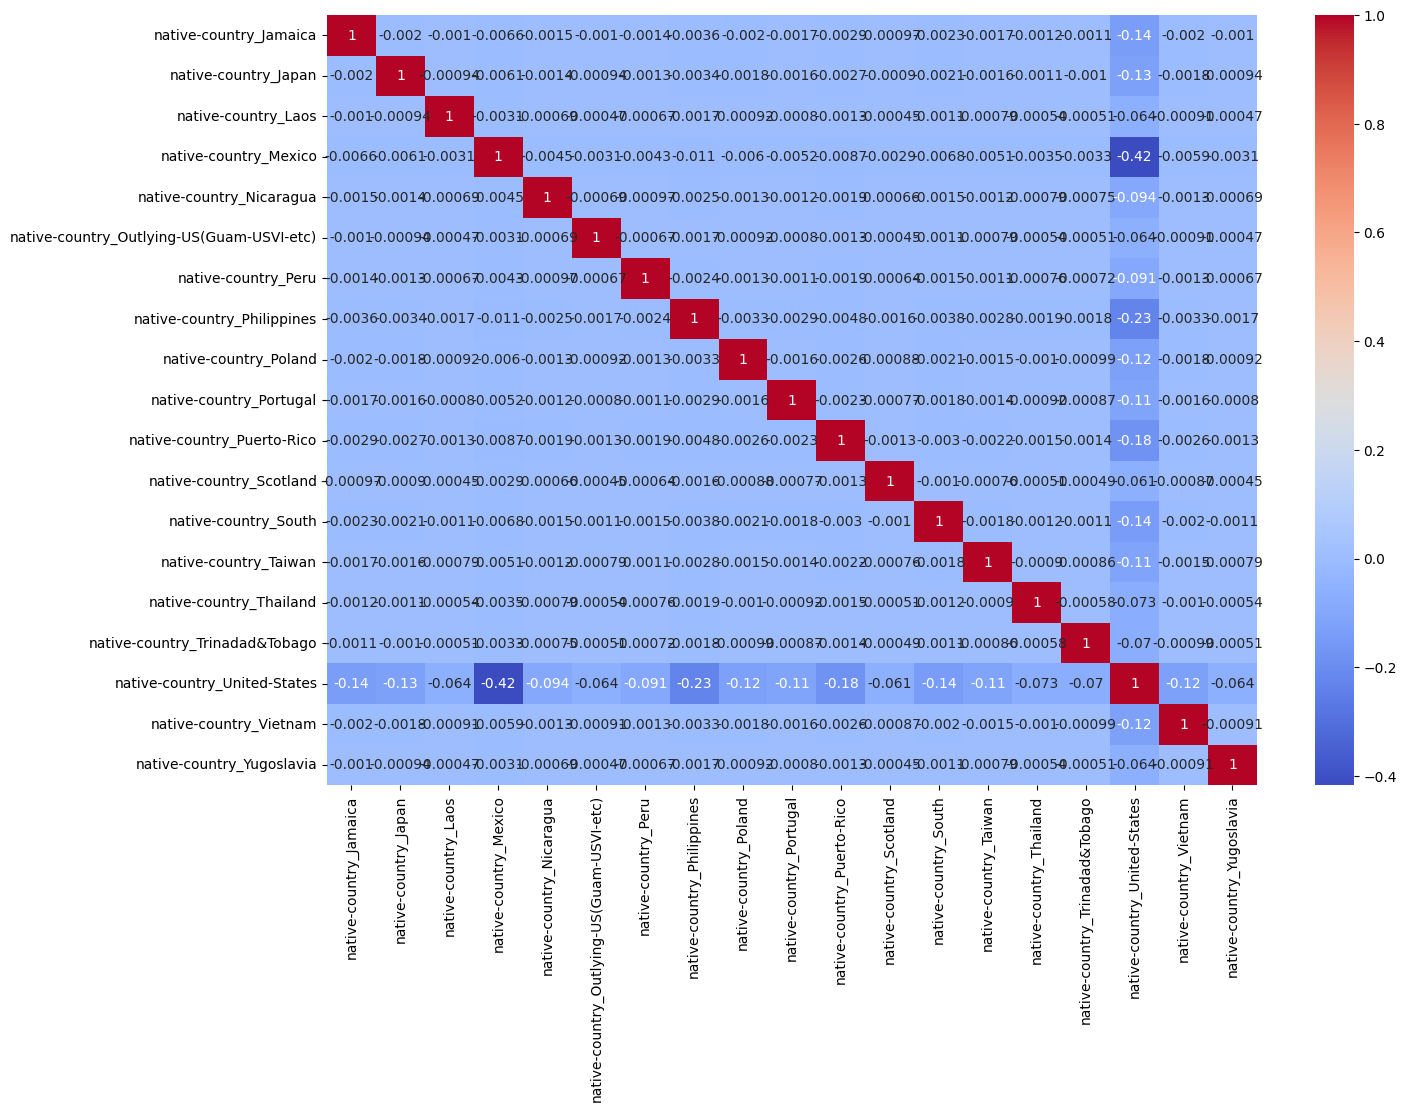

In [73]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_dropped.corr(), annot=True, cmap="coolwarm")

In [74]:
df = df.drop('fnlwgt', axis=1)
train_df, test_df = train_test_split(df, test_size=0.2)
train_df
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
8331,52,14,1,15024,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
43715,52,13,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
42507,35,13,0,0,0,45,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6278,52,10,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
34703,39,5,1,0,0,35,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11862,43,13,0,0,0,42,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
18018,21,9,0,0,1719,16,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
14503,38,14,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
36927,19,10,1,0,0,22,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [75]:
train_X = train_df.drop("income", axis=1)
train_y = train_df["income"]

test_X = test_df.drop("income", axis=1)
test_y = test_df["income"]

In [76]:
forest = RandomForestClassifier()

forest.fit(train_X, train_Y)

RandomForestClassifier()

In [77]:
forest.score(test_X, test_y)

1.0

In [78]:
forest.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [79]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [80]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=True)}

In [81]:
importances

{'age': 0.0,
 'educational-num': 0.0,
 'gender': 0.0,
 'capital-gain': 0.0,
 'capital-loss': 0.0,
 'hours-per-week': 0.0,
 'occupation_?': 0.0,
 'occupation_Adm-clerical': 0.0,
 'occupation_Armed-Forces': 0.0,
 'occupation_Craft-repair': 0.0,
 'occupation_Exec-managerial': 0.0,
 'occupation_Farming-fishing': 0.0,
 'occupation_Handlers-cleaners': 0.0,
 'occupation_Machine-op-inspct': 0.0,
 'occupation_Other-service': 0.0,
 'occupation_Priv-house-serv': 0.0,
 'occupation_Prof-specialty': 0.0,
 'occupation_Protective-serv': 0.0,
 'occupation_Sales': 0.0,
 'occupation_Tech-support': 0.0,
 'occupation_Transport-moving': 0.0,
 'workclass_?': 0.0,
 'workclass_Federal-gov': 0.0,
 'workclass_Local-gov': 0.0,
 'workclass_Never-worked': 0.0,
 'workclass_Private': 0.0,
 'workclass_Self-emp-inc': 0.0,
 'workclass_Self-emp-not-inc': 0.0,
 'workclass_State-gov': 0.0,
 'workclass_Without-pay': 0.0,
 'marital-status_Divorced': 0.0,
 'marital-status_Married-AF-spouse': 0.0,
 'marital-status_Married-civ-

In [82]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, verbose=10)

In [85]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]  # Change the values here
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, verbose=10)
